In [1]:
#LIBARIES IMPORTATION
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns

In [2]:
api_key='*IzaSyA1gy1POHMNDKXjg9nHE8BJ3fMA-N3ouJk'
#channel ids for various Japa(immigration route) content creator
channel_ids=['UCKojH1Q_BO27D_mRTuK6xcw',#WAKAWAKA_ DOCTOR
'UCjG5V4gnh-Kgr3JJksXt9CA', #Chokomillionaire
'UCKHpSJvXSVe3dm20ypGzCoA', #olu of canada
'UCfdbdH_dAOOucGv02SeKHiQ', #gloria otikporUCfdbdH_dAOOucGv02SeKHiQ
'UCLpJ1vyFeGw1AWlQ4eYHqmA', #ADA KINGS
'UClZpuEjFAUGMVbxRChW_A6g'#TOCHI ESTHER
]

#channel_id='UCjG5V4gnh-Kgr3JJksXt9CA'
youtube=build('youtube','v3',developerKey=api_key)

# EXTRACTING THE STATISTIC OF THE YOUTUBE CHANNELS

In [3]:
def getting_theyoutube_stats(youtube,channel_id):
    my_data=[]
    request=youtube.channels().list(
            part='snippet,contentDetails,statistics',
            id =','.join(channel_ids))
    response=request.execute()
    for i in range(len(response['items'])):
        data=dict(
                  channel_name =response['items'][i]['snippet']['title'],
                  subscribers=response['items'][i]['statistics']['subscriberCount'],
                  views=response['items'][i]['statistics']['viewCount'],
                  video_count=response['items'][i]['statistics']['videoCount'],
                  published_date=response['items'][i]['snippet']['publishedAt'],
                  country=response['items'][i]['snippet']['country'],
                  playlist_id=response['items'][i]['contentDetails']['relatedPlaylists']['uploads']
        )
        my_data.append(data)
    return my_data

In [5]:
channel_stat=getting_theyoutube_stats(youtube,channel_ids)
channel_stat

[{'channel_name': 'GLORIA OTIKOR',
  'subscribers': '26300',
  'views': '1291654',
  'video_count': '292',
  'published_date': '2016-11-30T18:05:17Z',
  'country': 'GB',
  'playlist_id': 'UUfdbdH_dAOOucGv02SeKHiQ'},
 {'channel_name': 'Tochi Esther',
  'subscribers': '155000',
  'views': '9913746',
  'video_count': '379',
  'published_date': '2021-04-29T21:30:34.831378Z',
  'country': 'GB',
  'playlist_id': 'UUlZpuEjFAUGMVbxRChW_A6g'},
 {'channel_name': 'Chorkor Millionaire',
  'subscribers': '78800',
  'views': '2974300',
  'video_count': '474',
  'published_date': '2021-05-25T23:18:26.95232Z',
  'country': 'CA',
  'playlist_id': 'UUjG5V4gnh-Kgr3JJksXt9CA'},
 {'channel_name': "Don't Go Broke Trying",
  'subscribers': '781',
  'views': '30084',
  'video_count': '36',
  'published_date': '2022-12-15T22:00:33.716664Z',
  'country': 'CA',
  'playlist_id': 'UUKHpSJvXSVe3dm20ypGzCoA'},
 {'channel_name': 'wakawaka _doctor',
  'subscribers': '199000',
  'views': '4600101',
  'video_count': '21

In [28]:
japa_content_creator=pd.DataFrame(channel_stat)
japa_content_creator['channel_name'] = japa_content_creator['channel_name'].replace(["Don't Go Broke Trying"], 'Olu of canada')
japa_content_creator

,channel_name,subscribers,views,video_count,published_date,country,playlist_id
0,GLORIA OTIKOR,26300,1291654,292,2016-11-30T18:05:17Z,GB,UUfdbdH_dAOOucGv02SeKHiQ
1,Tochi Esther,155000,9913746,379,2021-04-29T21:30:34.831378Z,GB,UUlZpuEjFAUGMVbxRChW_A6g
2,Chorkor Millionaire,78800,2974300,474,2021-05-25T23:18:26.95232Z,CA,UUjG5V4gnh-Kgr3JJksXt9CA
3,Olu of canada,781,30084,36,2022-12-15T22:00:33.716664Z,CA,UUKHpSJvXSVe3dm20ypGzCoA
4,wakawaka _doctor,199000,4600101,216,2014-01-08T09:49:10Z,GB,UUKojH1Q_BO27D_mRTuK6xcw
5,Ada Kings,38700,1478805,229,2014-11-17T05:27:11Z,GB,UULpJ1vyFeGw1AWlQ4eYHqmA


In [29]:
japa_content_creator.dtypes

channel_name      object
subscribers       object
views             object
video_count       object
published_date    object
country           object
playlist_id       object
dtype: object

In [30]:
japa_content_creator['subscribers']=pd.to_numeric(japa_content_creator['subscribers'])
japa_content_creator['views']=pd.to_numeric(japa_content_creator['views'])
japa_content_creator['video_count']=pd.to_numeric(japa_content_creator['video_count'])
japa_content_creator['published_date']=pd.to_datetime(japa_content_creator['published_date'])

In [31]:
japa_content_creator.dtypes

channel_name                   object
subscribers                     int64
views                           int64
video_count                     int64
published_date    datetime64[ns, UTC]
country                        object
playlist_id                    object
dtype: object

In [32]:
japa_content_creator

,channel_name,subscribers,views,video_count,published_date,country,playlist_id
0,GLORIA OTIKOR,26300,1291654,292,2016-11-30 18:05:17+00:00,GB,UUfdbdH_dAOOucGv02SeKHiQ
1,Tochi Esther,155000,9913746,379,2021-04-29 21:30:34.831378+00:00,GB,UUlZpuEjFAUGMVbxRChW_A6g
2,Chorkor Millionaire,78800,2974300,474,2021-05-25 23:18:26.952320+00:00,CA,UUjG5V4gnh-Kgr3JJksXt9CA
3,Olu of canada,781,30084,36,2022-12-15 22:00:33.716664+00:00,CA,UUKHpSJvXSVe3dm20ypGzCoA
4,wakawaka _doctor,199000,4600101,216,2014-01-08 09:49:10+00:00,GB,UUKojH1Q_BO27D_mRTuK6xcw
5,Ada Kings,38700,1478805,229,2014-11-17 05:27:11+00:00,GB,UULpJ1vyFeGw1AWlQ4eYHqmA


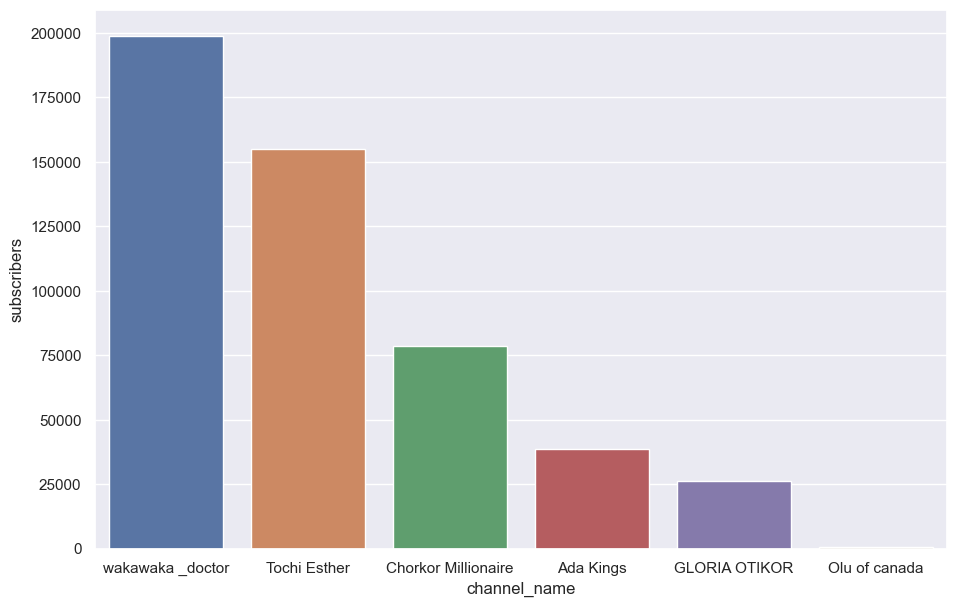

In [33]:
sns.set(rc={'figure.figsize':(11,7)})
sub_plot=sns.barplot(x='channel_name',y='subscribers', data=japa_content_creator,
                     order=japa_content_creator.sort_values('subscribers',ascending = False).channel_name)

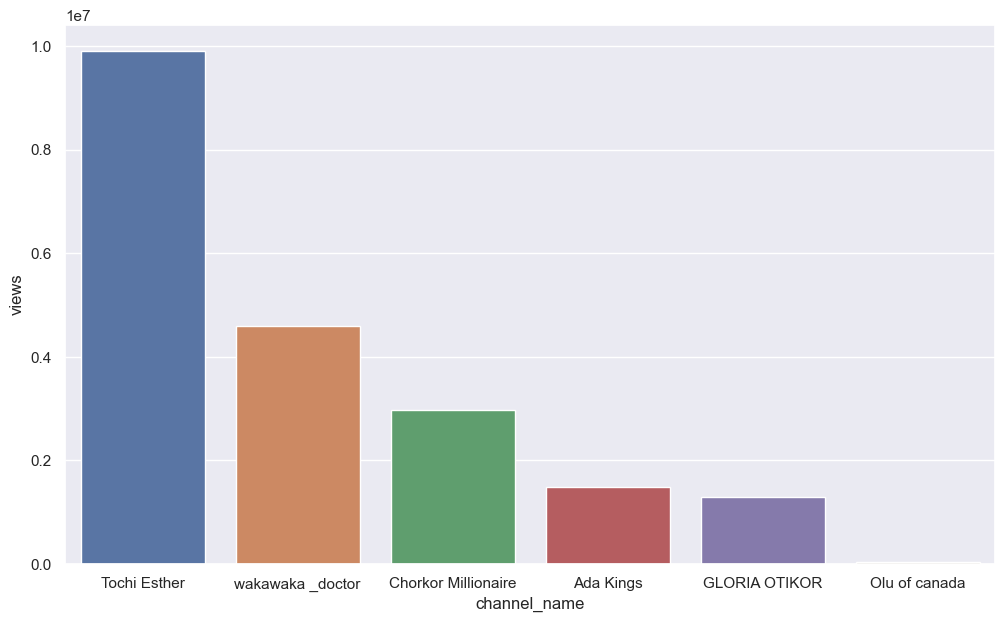

In [35]:
sns.set(rc={'figure.figsize':(12,7)})
sub_plot=sns.barplot(x='channel_name',y='views', data=japa_content_creator,order=japa_content_creator.sort_values('views',ascending = False).channel_name)

##GETTING THE VIDEO_ID

In [38]:
playlist_id=japa_content_creator.loc[japa_content_creator['channel_name']=='Chorkor Millionaire','playlist_id'].iloc[0]

In [39]:
playlist_id

'UUjG5V4gnh-Kgr3JJksXt9CA'

In [40]:
def get_video_id(youtube,playlist_id):
    
    request = youtube.playlistItems().list(
        part='contentDetails',
        playlistId=playlist_id,
        maxResults = 50# increasing the number of display videos per page
    )
    response = request.execute()
    video_id =[]
    for i in range(len(response['items'])):
        video_id.append(response['items'][i]['contentDetails']['videoId'])
    next_page_token=response.get('nextPageToken')
    more_pages=True
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId=playlist_id,
                maxResults = 50, 
                pageToken=next_page_token 
            )
            response = request.execute()
            for i in range(len(response['items'])):
                video_id.append(response['items'][i]['contentDetails']['videoId'])
            next_page_token=response.get('nextPageToken')

    return video_id

In [41]:
video_ids=get_video_id(youtube,playlist_id)
video_ids

['Xrvy1HUtCqw',
 'Oko6kTe-g4s',
 'Ib3pS8qo6XY',
 '6udlKA4X7lI',
 '2wtDTCF_Gpg',
 'oeqR5lTTdQM',
 'pK8JTjrIizg',
 'wt9eabLv6RY',
 'SK-l2hyh0z8',
 'BvyjGVgG6MA',
 '1VgDDhN-WZ4',
 'gNWeZEs6WbI',
 'ccRZKmJx15Q',
 'FnLEzlIN-Nk',
 'UtIhPUfKsl0',
 'SoY7zeeS85Y',
 '2TeSTjHNe00',
 'Xv_bwgG1WZA',
 'TglYfhL26CQ',
 'xLM8Gfjwi4E',
 'G0Qv_CWHibY',
 'wXvPlfM78yM',
 '51rsBk7L3hM',
 '3aj-pkoIPSU',
 'JhezJe-hvYs',
 'TF2Nra04zS8',
 'QdLCss1l2FU',
 'nz-9Gc5UiMw',
 'gqFn4nSn8bk',
 'teiC0c7xPOM',
 'xJdF5v1pYFA',
 'sVc1PyUC-IE',
 'pvJFo5tFHFM',
 'CoqOwKE0H_8',
 'B0f1lBMc8ts',
 'f8z9LFQwSug',
 'PVPHdIv0JvE',
 'WbceP007mog',
 'qLFN9EQMqzk',
 '8RSCIOVCfeg',
 'wXTArPmc-qU',
 '_GLoJfVz3-M',
 'QNOUV_ODV4M',
 'p--FKZD-F1w',
 'IvKUC91ebPk',
 '5OiGSOE98-k',
 '4vieS63-J3M',
 'TOSH4SulHv8',
 'T52shCdIwSo',
 'dkU8Huy4wPM',
 'pxPIT8hYuJg',
 'eFXMohvT2rM',
 '4bxZW1f4f8w',
 'zY_CtYs-Hus',
 'oPKeEkDWiw0',
 'bU8duRDTiZ4',
 'yd4liEV65mI',
 '1Vbjt47hkwI',
 'dDQm7Z4UoLg',
 'GwovxT9Qo5c',
 '168Nal9-N6s',
 'j8UNVokmBvw',
 'ebKMy0

In [43]:
##functions to get video_details

In [62]:
def get_videos_details(youtube,video_ids):
    all_video_stat=[]
    for i in range(0, len(video_ids), 50):
        request=youtube.videos().list(
            part='snippet,statistics',
            id=','.join(video_ids[i:i+50]))
        response=request.execute()
        for video in response['items']:
            video_stat= dict( Title=video['snippet']['title'],
                              PublishedAt=video['snippet']['publishedAt'],
                              Views=video['statistics']['viewCount'],
                              Likes=video['statistics']['likeCount'],
                             Comment=video['statistics']['commentCount']
                            )
            all_video_stat.append(video_stat)
    return all_video_stat

In [63]:
video_details=get_videos_details(youtube,video_ids)
video_details=pd.DataFrame(video_details)
video_details

,Title,PublishedAt,Views,Likes,Comment
0,This is the cheapest university with scholarsh...,2023-08-26T06:26:56Z,12932,532,139
1,MASSIVE JOBS AND PERMANENT RESIDENCE OPPORTUNI...,2023-08-25T10:55:11Z,20290,927,134
2,BREAKING NEWS|Canada to reduce Student visas,2023-08-23T12:12:20Z,59937,1557,334
3,How to buy cheap cars in Canada,2023-08-22T10:41:02Z,12163,743,97
4,"CANADA VISA APPROVED WITH A $2,OOO BANK STATEMENT",2023-08-18T01:10:54Z,11443,350,140
...,...,...,...,...,...
471,How to come to Canada as a Refugee,2021-07-16T13:19:34Z,2673,108,32
472,This ugly property made me over $200k in 1year,2021-07-16T12:28:47Z,822,32,6
473,How I spend time with my kids on Paternity leave,2021-07-16T11:48:20Z,102,8,3
474,HARD TALK BUT THE TRUTH: Why many immigrants s...,2021-07-16T10:26:22Z,504,31,10


In [64]:
video_details.dtypes

Title          object
PublishedAt    object
Views          object
Likes          object
Comment        object
dtype: object

In [68]:
video_details['PublishedAt']=pd.to_datetime(video_details['PublishedAt']).dt.date
video_details['Views']=pd.to_numeric(video_details['Views'])
video_details['Likes']=pd.to_numeric(video_details['Likes'])
video_details['Comment']=pd.to_numeric(video_details['Comment'])

In [69]:
video_details

,Title,PublishedAt,Views,Likes,Comment
0,This is the cheapest university with scholarsh...,2023-08-26,12932,532,139
1,MASSIVE JOBS AND PERMANENT RESIDENCE OPPORTUNI...,2023-08-25,20290,927,134
2,BREAKING NEWS|Canada to reduce Student visas,2023-08-23,59937,1557,334
3,How to buy cheap cars in Canada,2023-08-22,12163,743,97
4,"CANADA VISA APPROVED WITH A $2,OOO BANK STATEMENT",2023-08-18,11443,350,140
...,...,...,...,...,...
471,How to come to Canada as a Refugee,2021-07-16,2673,108,32
472,This ugly property made me over $200k in 1year,2021-07-16,822,32,6
473,How I spend time with my kids on Paternity leave,2021-07-16,102,8,3
474,HARD TALK BUT THE TRUTH: Why many immigrants s...,2021-07-16,504,31,10


In [70]:
top_8_views=video_details.sort_values(by='Views', ascending=False).head(8)
top_8_views

,Title,PublishedAt,Views,Likes,Comment
206,Stop chasing irrelevant degrees and focus on t...,2023-02-25,267076,6753,1310
29,Move to Alberta NOW for FAST rural community j...,2023-07-12,187872,9228,1019
33,Before you move to canada with your visitors V...,2023-07-05,179180,4038,948
213,This is the CHEAPEST College in Canada with a ...,2023-02-16,140157,4649,780
14,Why you should consider becoming a truck driv...,2023-08-02,81344,2621,511
202,Canadian Court rules that international studen...,2023-03-03,67607,1244,286
129,The only video you need to Migrate to Canada,2023-05-01,67140,2671,757
2,BREAKING NEWS|Canada to reduce Student visas,2023-08-23,59937,1557,334


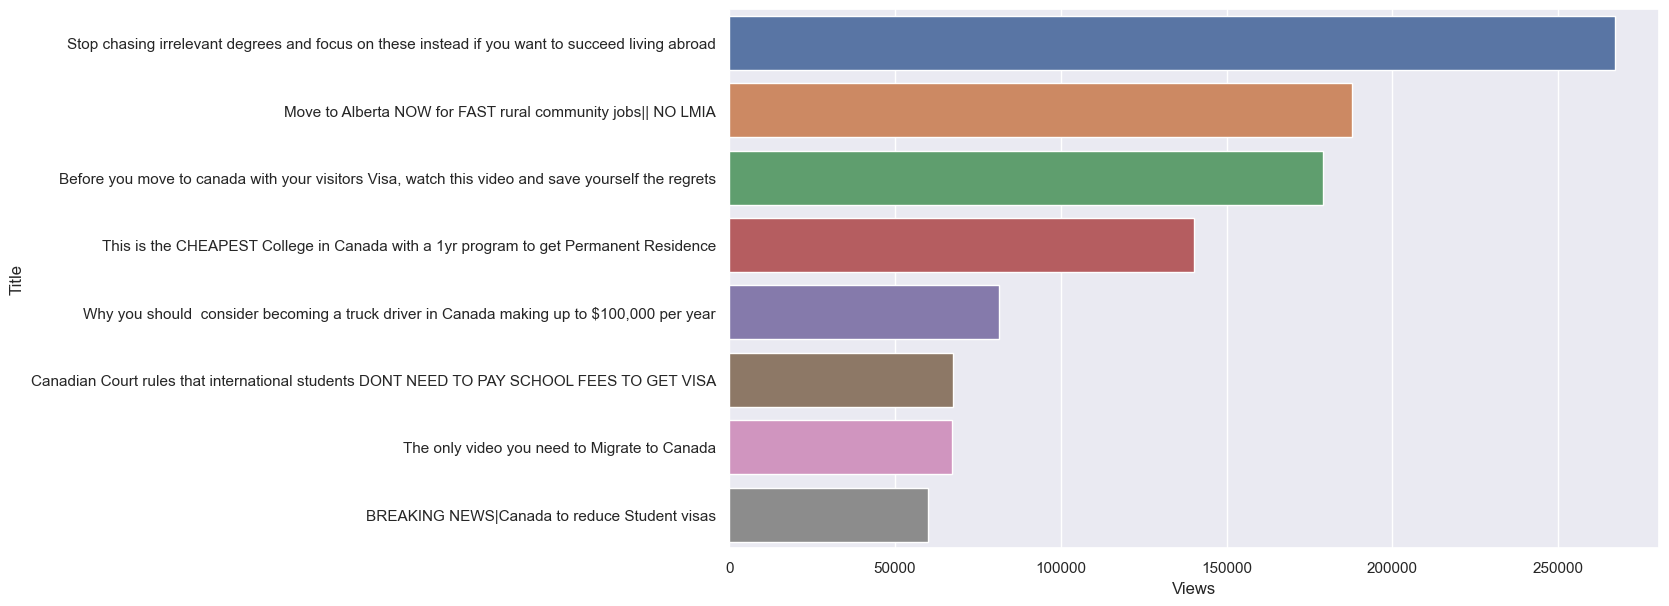

In [83]:
ax1=sns.barplot(x='Views',y='Title', data=top_8_views, order=top_8_views.sort_values('Views',ascending = False).Title)

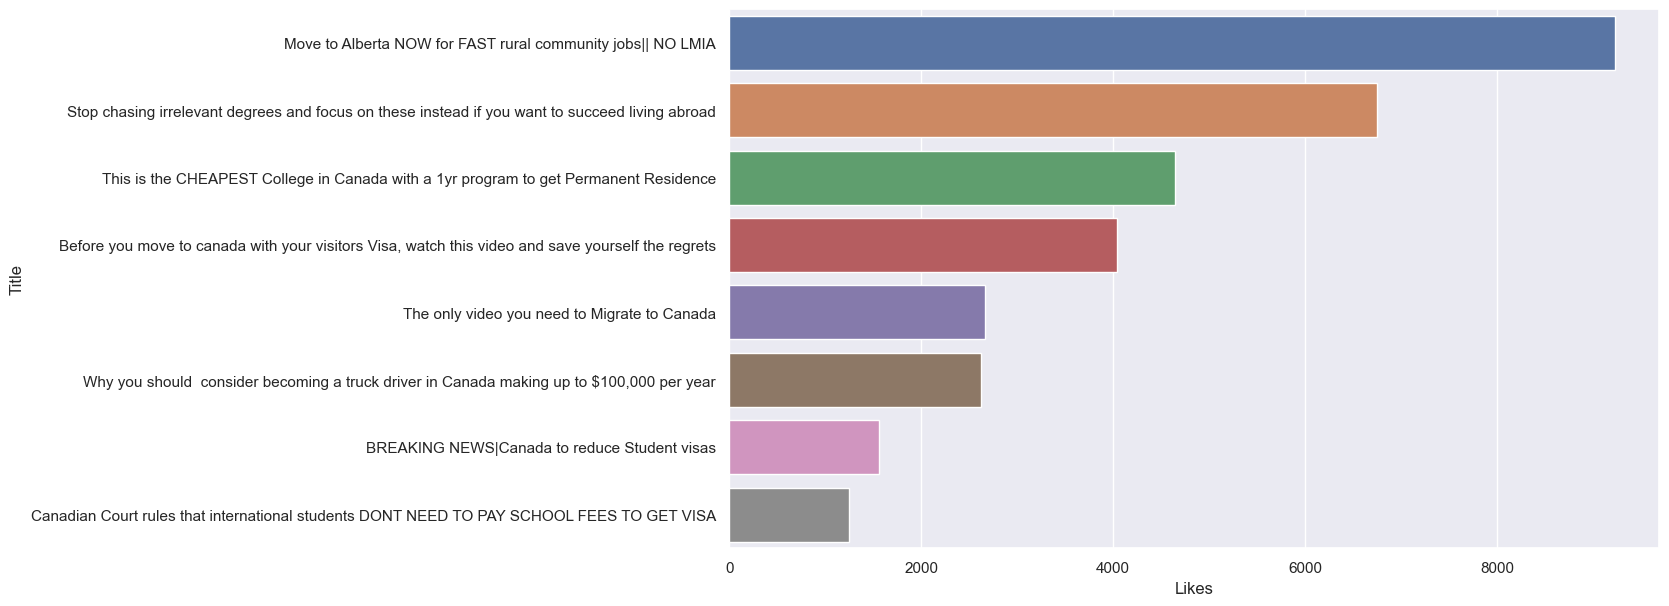

In [84]:
likes_plot=sns.barplot(x='Likes',y='Title', data=top_8_views, order=top_8_views.sort_values('Likes',ascending = False).Title)

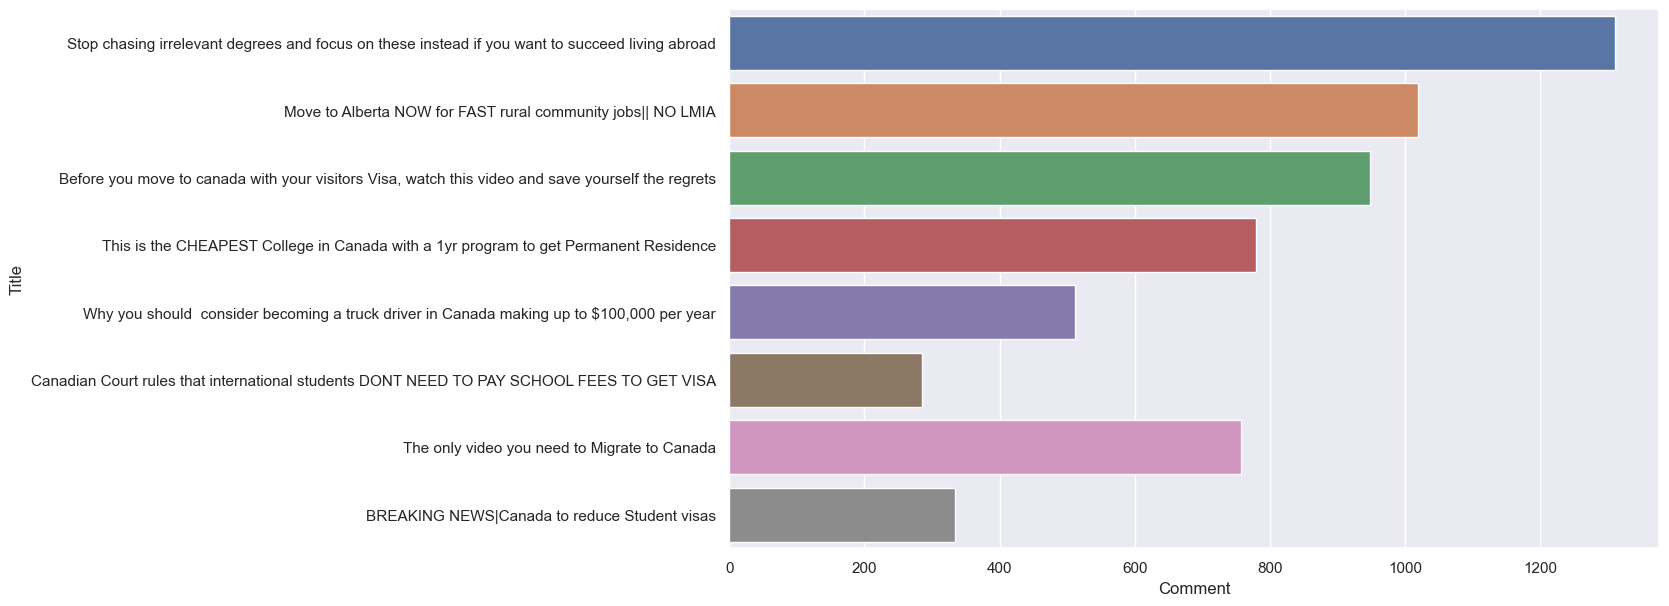

In [78]:
comment_plot=sns.barplot(x='Comment',y='Title', data=top_8_views, order=top_8_views.sort_values('Comments',ascending = False).Title)

In [72]:
video_details['Month']=pd.to_datetime(video_details['PublishedAt']).dt.strftime('%b')
video_details['Year']=pd.to_datetime(video_details['PublishedAt']).dt.strftime('%Y')
video_details

,Title,PublishedAt,Views,Likes,Comment,Month,Year
0,This is the cheapest university with scholarsh...,2023-08-26,12932,532,139,Aug,2023
1,MASSIVE JOBS AND PERMANENT RESIDENCE OPPORTUNI...,2023-08-25,20290,927,134,Aug,2023
2,BREAKING NEWS|Canada to reduce Student visas,2023-08-23,59937,1557,334,Aug,2023
3,How to buy cheap cars in Canada,2023-08-22,12163,743,97,Aug,2023
4,"CANADA VISA APPROVED WITH A $2,OOO BANK STATEMENT",2023-08-18,11443,350,140,Aug,2023
...,...,...,...,...,...,...,...
471,How to come to Canada as a Refugee,2021-07-16,2673,108,32,Jul,2021
472,This ugly property made me over $200k in 1year,2021-07-16,822,32,6,Jul,2021
473,How I spend time with my kids on Paternity leave,2021-07-16,102,8,3,Jul,2021
474,HARD TALK BUT THE TRUTH: Why many immigrants s...,2021-07-16,504,31,10,Jul,2021


In [73]:
video_per_year=video_details.groupby('Year',as_index=False).size()
video_per_year

,Year,size
0,2021,221
1,2022,40
2,2023,215


In [74]:
video_per_month=video_details.groupby('Month', as_index=False).size()
video_per_month

,Month,size
0,Apr,53
1,Aug,62
2,Dec,31
3,Feb,9
4,Jan,20
5,Jul,112
6,Jun,42
7,Mar,34
8,May,55
9,Oct,30


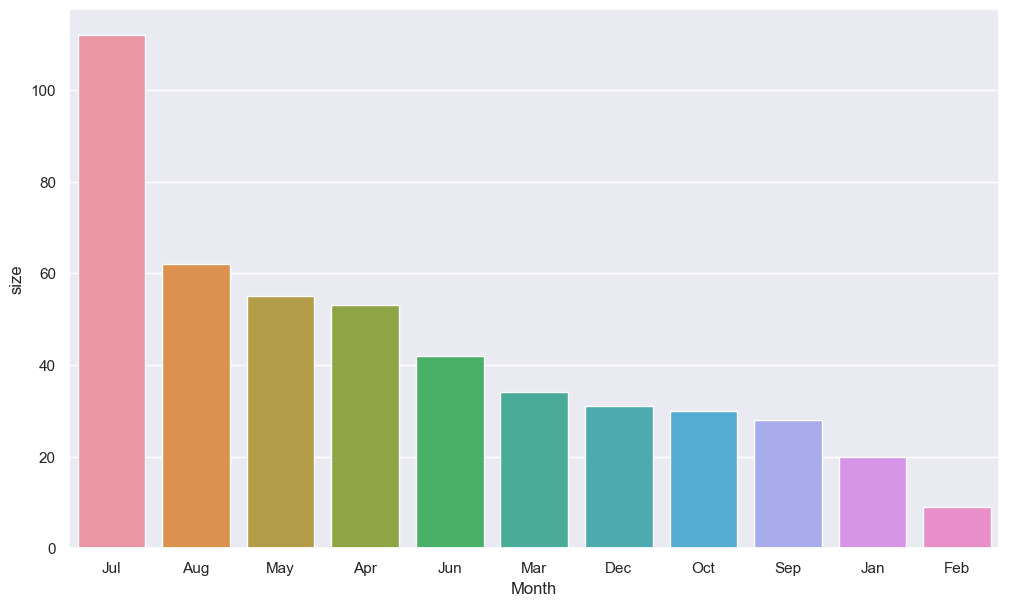

In [85]:
ax2=sns.barplot(x='Month',y='size', data=video_per_month, order=video_per_month.sort_values('size',ascending = False).Month)

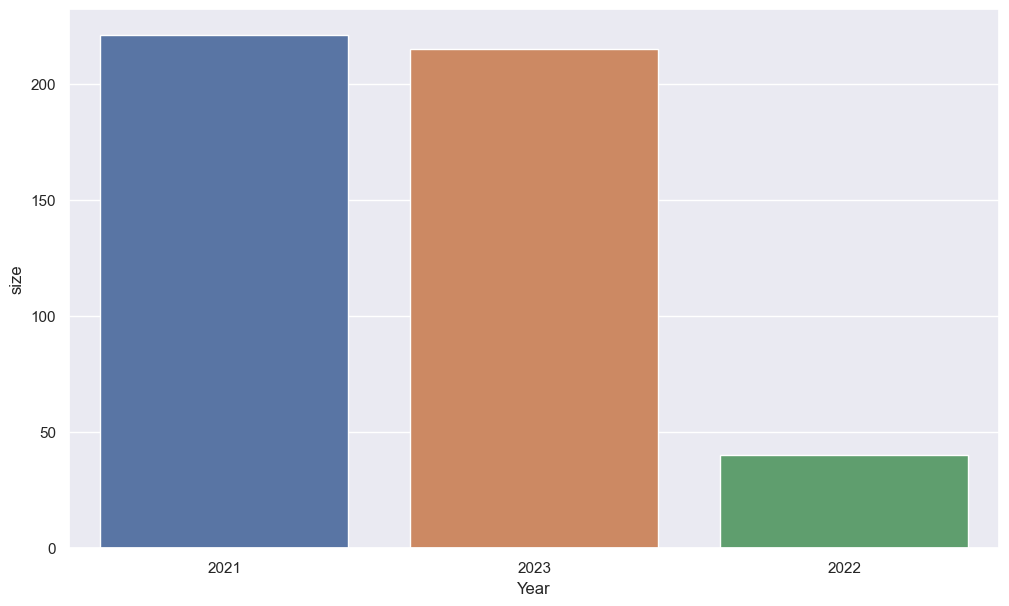

In [86]:
ax3=sns.barplot(x='Year',y='size', data=video_per_year,order=video_per_year.sort_values('size',ascending = False).Year)